In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\lenovo\Desktop\ironhack\FINAL PROJECT\french-box-office\data/dataset_final.csv')

In [3]:
df.drop(columns='Unnamed: 0',inplace=True)

In [4]:
df.shape

(3973, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   global_rank          3971 non-null   float64
 1   title                3971 non-null   object 
 2   id                   3971 non-null   float64
 3   release_date         3971 non-null   object 
 4   day                  3971 non-null   float64
 5   month                3971 non-null   float64
 6   year                 3971 non-null   float64
 7   max_theaters_used    3971 non-null   float64
 8   first_day_sales      3819 non-null   float64
 9   first_weekend_sales  3797 non-null   float64
 10  first_week_sales     3971 non-null   float64
 11  total_sales          3971 non-null   float64
 12  viewers_by_theaters  3971 non-null   float64
 13  tmdb_id              2358 non-null   float64
 14  budget               3973 non-null   float64
 15  imdb_id              2201 non-null   o

In [6]:
df['release_date']= pd.to_datetime(df['release_date'],format = '%Y-%m-%d')

In [7]:
releases_by_date=df[['release_date','title']].groupby('release_date').agg('count')

<AxesSubplot:xlabel='release_date'>

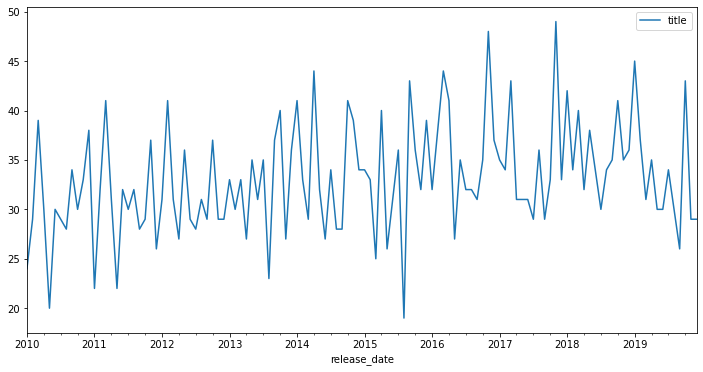

In [8]:

releases_month = releases_by_date.groupby(pd.Grouper( freq='1M')).sum() 
releases_month.plot(figsize=(12,6))

In [9]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

<ipython-input-10-d473e40369ef>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result= sm.tsa.seasonal_decompose(releases_by_date['title'], freq=60)


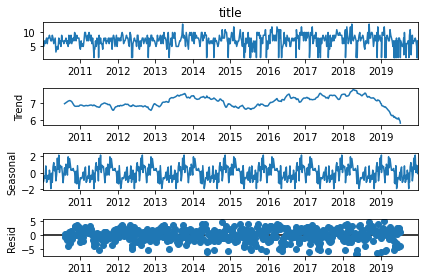

In [10]:
result= sm.tsa.seasonal_decompose(releases_by_date['title'], freq=60)
result.plot()
plt.show()

In [11]:
sales_by_date=df[['release_date','total_sales']].groupby('release_date').agg('sum')

sales_by_date.head()

,total_sales
release_date,
2010-01-06,1285370.0
2010-01-13,3950829.0
2010-01-20,2841223.0
2010-01-27,7725836.0
2010-02-03,4194071.0


<ipython-input-12-6c1fb7b55011>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result= sm.tsa.seasonal_decompose(sales_by_date, freq=60)


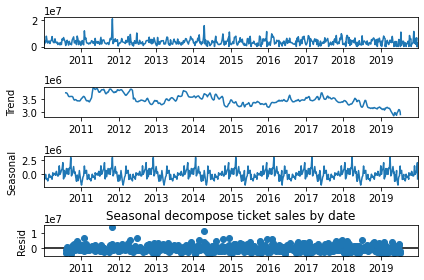

In [12]:
result= sm.tsa.seasonal_decompose(sales_by_date, freq=60)

result.plot()
plt.title('Seasonal decompose ticket sales by date')
plt.show()

In [13]:
result.seasonal

release_date
2010-01-06   -9.322146e+05
2010-01-13   -7.287297e+05
2010-01-20   -5.831843e+04
2010-01-27   -8.924507e+05
2010-02-03   -8.332755e+05
                  ...     
2019-12-11    2.459235e+05
2019-12-18    6.729882e+05
2019-12-20    9.313822e+05
2019-12-25    1.990789e+06
2019-12-27   -8.430491e+05
Name: seasonal, Length: 568, dtype: float64

<AxesSubplot:xlabel='release_date'>

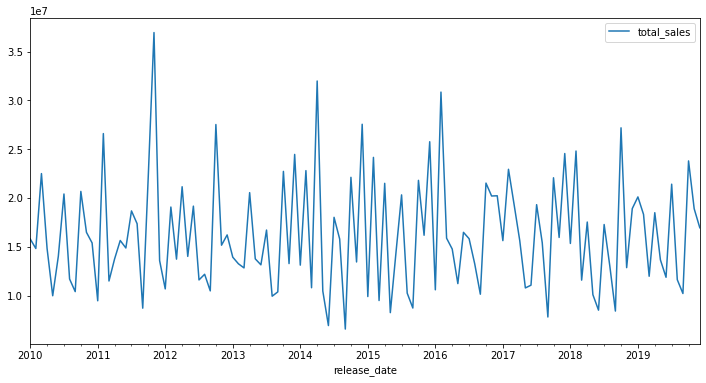

In [14]:
sales_month = sales_by_date.groupby(pd.Grouper( freq='1M')).sum() 
sales_month.plot(figsize=(12,6))

<AxesSubplot:xlabel='release_date'>

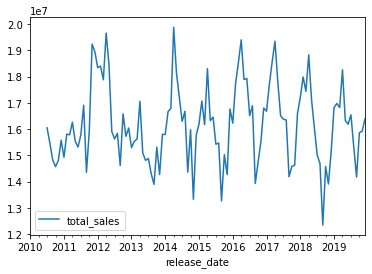

In [17]:
sales_month.rolling(window=7).mean().plot()

In [18]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [19]:
res = adfuller(sales_by_date)
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -9.225147
p-value: 0.000000
critical values at different levels:
	1%: -3.442
	5%: -2.867
	10%: -2.570


In [20]:
adf_test = adfuller(sales_by_date)
print("ADF = " + str(adf_test[0]))
print("p-value = " +str(adf_test[1]))

ADF = -9.225146901809138
p-value = 1.7372545118653448e-15


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

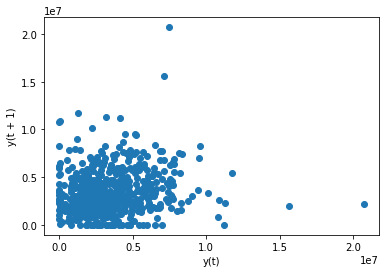

In [21]:
pd.plotting.lag_plot(sales_by_date,lag=1)


In [24]:
X = sales_month.dropna()
train_data = X[1:len(X)-24]
test_data = X[len(X)-100:len(X)-12]

In [25]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score
#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()
print('The lag value chose is: %s' % model_fitted.k_ar)

The lag value chose is: 12


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [26]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
predictions

2018-01-31    1.456907e+07
2018-02-28    2.115302e+07
2018-03-31    1.677672e+07
2018-04-30    1.630897e+07
2018-05-31    1.241996e+07
                  ...     
2024-12-31    1.694495e+07
2025-01-31    1.617335e+07
2025-02-28    1.696520e+07
2025-03-31    1.605213e+07
2025-04-30    1.675125e+07
Freq: M, Length: 88, dtype: float64

In [27]:
tt=pd.DataFrame(data=predictions)
tt=tt.reset_index()
x=test_data["total_sales"].reset_index()
x["pred"]=tt[0]
x

,release_date,total_sales,pred
0,2011-09-30,8706365.0,1.456907e+07
1,2011-10-31,22469385.0,2.115302e+07
2,2011-11-30,36953712.0,1.677672e+07
3,2011-12-31,13581540.0,1.630897e+07
4,2012-01-31,10681120.0,1.241996e+07
...,...,...,...
83,2018-08-31,13061913.0,1.694495e+07
84,2018-09-30,8409808.0,1.617335e+07
85,2018-10-31,27190388.0,1.696520e+07
86,2018-11-30,12860296.0,1.605213e+07


In [28]:
x.shape

(88, 3)

In [29]:

# create a comparison dataframe
compare_df = pd.concat(
    [sales_month.tail(12),
    predictions], axis=1).rename(
    columns={'total_sales': 'actual', 0:'predicted'})
compare_df=compare_df[['actual', 'predicted']].dropna()

In [30]:
### ESSAI

In [31]:
X = sales_month.dropna()
train_data = X[1:len(X)-24]
test_data = X[len(X)-24:len(X)-12]

In [32]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score
#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

print('The lag value chose is: %s' % model_fitted.k_ar)

The lag value chose is: 12


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [33]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
predictions

2018-01-31    1.456907e+07
2018-02-28    2.115302e+07
2018-03-31    1.677672e+07
2018-04-30    1.630897e+07
2018-05-31    1.241996e+07
2018-06-30    1.413629e+07
2018-07-31    1.655164e+07
2018-08-31    1.489049e+07
2018-09-30    1.141997e+07
2018-10-31    2.040045e+07
2018-11-30    1.608243e+07
2018-12-31    2.122108e+07
Freq: M, dtype: float64

In [34]:
r2_score(test_data,predictions)

0.6131627631718829

In [35]:
tt=pd.DataFrame(data=predictions)
tt=tt.reset_index()
x=test_data["total_sales"].reset_index()
x["pred"]=tt[0]
x

,release_date,total_sales,pred
0,2018-01-31,15339491.0,1.456907e+07
1,2018-02-28,24812429.0,2.115302e+07
2,2018-03-31,11578932.0,1.677672e+07
3,2018-04-30,17533788.0,1.630897e+07
4,2018-05-31,10088641.0,1.241996e+07
5,2018-06-30,8503620.0,1.413629e+07
6,2018-07-31,17279860.0,1.655164e+07
7,2018-08-31,13061913.0,1.489049e+07
8,2018-09-30,8409808.0,1.141997e+07
9,2018-10-31,27190388.0,2.040045e+07


In [36]:
x.total_sales.mean()

15464456.166666666

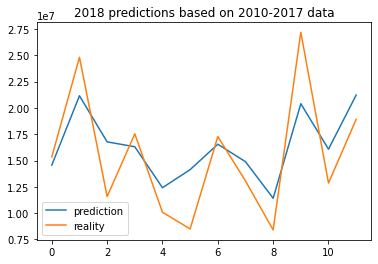

In [40]:
plt.title('2018 predictions based on 2010-2017 data')
plt.plot(x.pred,label='prediction')
plt.plot(x.total_sales,label='reality')
legend_drawn_flag = True
plt.legend()

plt.show()